<a href="https://colab.research.google.com/github/shamsulhoquekhan1/Data-Analytics-for-Finance/blob/main/CA1_data_analytics_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Collection Stage

First, I will import necessary libraries




In [1]:
import pandas as pd   # Data handling and cleaning
import numpy as np    # Data handling and cleaning
import matplotlib.pyplot as plt   # for visual, from prem
import seaborn as sns    # for visual, from prem
from google.colab import files  # for importing files in Google Colab
import requests   # for API request
import json
from statsmodels.tsa.stattools import adfuller # for stationarity check in time series



As requested, the 5-year NASDAQ daily closing prices are now being imported. The files are in .xlsx format. As 3 constituent companies from NASDAQ, I have picked Apple, Microsoft, and Nvidia.

In [2]:
upload = files.upload()

Saving Alphabet.0.800%_text.txt to Alphabet.0.800%_text.txt
Saving Amazon.4.800%_text.txt to Amazon.4.800%_text.txt
Saving Apple_AAPL.xlsx to Apple_AAPL.xlsx
Saving Coca_KO.xlsx to Coca_KO.xlsx
Saving DJIA.xlsx to DJIA.xlsx
Saving Gold.csv to Gold.csv
Saving JohnsonJohnson_JNJ.xlsx to JohnsonJohnson_JNJ.xlsx
Saving McDonalds_MCD.xlsx to McDonalds_MCD.xlsx
Saving Microsoft_MSFT.xlsx to Microsoft_MSFT.xlsx
Saving NASDAQ_Index.xlsx to NASDAQ_Index.xlsx
Saving NVDA.3.200%_text.txt to NVDA.3.200%_text.txt
Saving NVIDIA.xlsx to NVIDIA.xlsx
Saving Silver.csv to Silver.csv


In [3]:
nasdaq = pd.read_excel("NASDAQ_Index.xlsx")
apple = pd.read_excel("Apple_AAPL.xlsx")
microsoft = pd.read_excel("Microsoft_MSFT.xlsx")
nvidia = pd.read_excel("NVIDIA.xlsx")

As requested, the 5-year DOW Jones Industrial Average Index (DJIA) daily closing prices are now being imported. The files are in .xlsx format. As the 3 constituent companies from DJIA, I have picked Coca Cola, Johnson & Johnson, and McDonald's.

In [4]:
#upload = files.upload()

In [5]:
djia = pd.read_excel("DJIA.xlsx")
coca_cola = pd.read_excel("Coca_KO.xlsx")
johnson = pd.read_excel("JohnsonJohnson_JNJ.xlsx")
mcdonald = pd.read_excel("McDonalds_MCD.xlsx")

As 2 traded commodities, I have picked Gold and Silver, because these have reliable daily price data, strong economic relevance, and ease of working with time-series. The 5 year data is in .CSV format.

In [6]:
#upload = files.upload()

In [7]:
gold = pd.read_csv("Gold.csv")
silver = pd.read_csv("Silver.csv")

For the 3 listed commercial bonds, I decided to target the technology sector bonds: Amazon.com Inc. 4.800% (2034), Alphabet Inc. 0.800% (2027), and NVIDIA Corporation 3.200% (2026). The files are in .txt tab-separated format.

In [8]:
#upload = files.upload()

In [9]:
alphabet_b = pd.read_csv("Alphabet.0.800%_text.txt", sep="\t", header=2)
amazon_b = pd.read_csv("Amazon.4.800%_text.txt", sep="\t", header=2)
nvidia_b = pd.read_csv("NVDA.3.200%_text.txt", sep="\t", header=2)


# header = 2 because we are considering the 3rd line/row of the .txt file as column names.
# reference code: https://www.youtube.com/watch?v=IF73V0FMfLk

Now I am dowloading most recent 5 years of data for Ireland GDP Growth (%) using the World Bank API. The data is in JSON format. GDP data is only available in a yearly format. Also, the data is available till 2024. To call the data, I followed World Bank's API documentation, using country code "IRL" for Ireland and “NY.GDP.MKTP.KD.ZG” for GDP indicator.

In [10]:
# API url for GDP Growth

url = "https://api.worldbank.org/v2/country/IRL/indicator/NY.GDP.MKTP.KD.ZG?format=json&date=2020:2024&per_page=100"


# Reference: https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information
# API Structure Description: https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures


# Gathering the data

res = requests.get(url)
data = res.json()[1]  # Index 1 is actual data and 0 is meta data

# Code Reference: https://www.youtube.com/watch?v=JVQNywo4AbU


# To DataFrame

gdp = pd.json_normalize(data)

# Code for data frame structure reference: https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

# Filtering and just keeping the GPD and Date

gdp = gdp[["date", "value"]]
gdp.rename(columns={"date": "Date", "value": "GDP_Growth_(%)"}, inplace=True)

# Display first rows

gdp

,Date,GDP_Growth_(%)
0,2024,1.221334
1,2023,-5.530007
2,2022,8.619503
3,2021,16.255614
4,2020,7.157899


# 2) Data Cleaning and Formatting Stage

First, I will investigate missing values. Then I will filter out the columns that aren't necessary for the project. Finally, I will investigate the data sets to see any further conversion or formatting is required.

In [11]:
# Investigating the column names

microsoft.head()

,Price History: MSFT-US,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,Price,CVol,Change,% Change,% Return,Total Return (Gross),Cumulative Return %,Open,High,Low,Cumulative Change %
2,2021-02-19 00:00:00,240.97,25262600,NaN,NaN,NaN,240.97,NaN,243.75,243.86,240.18,NaN
3,2021-02-22 00:00:00,234.51,36446940,-6.46,-2.680832,-2.680832,234.51,-2.680832,237.42,237.93,232.4,-2.680832
4,2021-02-23 00:00:00,233.27,30228700,-1.24,-0.528762,-0.528762,233.27,-3.195419,230.325,234.83,228.73,-3.195419


The first row seems to be unnecessary. Also, the column name should be the second row. Lastly, we only need the Date and Price (closing price) columns.

In [12]:
microsoft.columns = microsoft.iloc[1] # Taking index 1 as column names

microsoft = microsoft.drop([0, 1]).reset_index(drop=True) # Dropping the first two rows as these are not necessary

microsoft.columns.name = None  # removing index 1 from the header name

microsoft = microsoft[["Date", "Price"]]  # Only keeping the Date and Price

microsoft.head()

,Date,Price
0,2021-02-19 00:00:00,240.97
1,2021-02-22 00:00:00,234.51
2,2021-02-23 00:00:00,233.27
3,2021-02-24 00:00:00,234.55
4,2021-02-25 00:00:00,228.99


Now I have a properly structured data frame for Microsoft. As all the data downloaded from FactSet follow the same structure, I will follow the same procedure for all of them.

In [13]:
# For NASDAQ
nasdaq.columns = nasdaq.iloc[1]
nasdaq = nasdaq.drop([0, 1]).reset_index(drop=True)
nasdaq.columns.name = None
nasdaq = nasdaq[["Date", "Price"]]

# For Apple
apple.columns = apple.iloc[1]
apple = apple.drop([0, 1]).reset_index(drop=True)
apple.columns.name = None
apple = apple[["Date", "Price"]]

# For NVIDIA
nvidia.columns = nvidia.iloc[1]
nvidia = nvidia.drop([0, 1]).reset_index(drop=True)
nvidia.columns.name = None
nvidia = nvidia[["Date", "Price"]]

# For DJIA
djia.columns = djia.iloc[1]
djia = djia.drop([0, 1]).reset_index(drop=True)
djia.columns.name = None
djia = djia[["Date", "Price"]]

# For Coca Cola
coca_cola.columns = coca_cola.iloc[1]
coca_cola = coca_cola.drop([0, 1]).reset_index(drop=True)
coca_cola.columns.name = None
coca_cola = coca_cola[["Date", "Price"]]

# For Johnson & Johnson
johnson.columns = johnson.iloc[1]
johnson = johnson.drop([0, 1]).reset_index(drop=True)
johnson.columns.name = None
johnson = johnson[["Date", "Price"]]

# For McDonald's
mcdonald.columns = mcdonald.iloc[1]
mcdonald = mcdonald.drop([0, 1]).reset_index(drop=True)
mcdonald.columns.name = None
mcdonald = mcdonald[["Date", "Price"]]

# For Gold
gold.columns = gold.iloc[1]
gold = gold.drop([0, 1]).reset_index(drop=True)
gold.columns.name = None
gold = gold[["Date", "Price"]]

# For Silver
silver.columns = silver.iloc[1]
silver = silver.drop([0, 1]).reset_index(drop=True)
silver.columns.name = None
silver = silver[["Date", "Price"]]




The Bond files do not have this issue. It is properly imported, with the 2nd row serving as the header. As a result, I need to filter out the rest of the columns except the Date and Price columns.

In [14]:
# For Alphabet 0.800%
alphabet_b = alphabet_b[["Date", "Price"]]

# For Amazon 4.800%
amazon_b = amazon_b[["Date", "Price"]]

# For NVIDIA 3.200%
nvidia_b = nvidia_b[["Date", "Price"]]



In [15]:
alphabet_b.tail(10)

,Date,Price
997,02/07/25,91.54
998,02/10/25,91.60
999,02/11/25,91.57
1000,02/12/25,91.43
1001,02/13/25,91.55
1002,02/14/25,91.70
1003,02/18/25,91.64
1004,02/19/25,91.69
1005,02/20/25,91.70
1006,02/21/25,91.87


I will not investigate the date range of the collected data sets to show that I have met the requirement.

In [16]:
print(nasdaq["Date"].min(), nasdaq["Date"].max())

print(apple["Date"].min(), apple["Date"].max())

print(nvidia_b["Date"].min(), nvidia_b["Date"].max())

print(gold["Date"].min(), gold["Date"].max())

print(silver["Date"].min(), silver["Date"].max())

2021-02-19 00:00:00 2025-02-21 00:00:00
2021-02-19 00:00:00 2025-02-21 00:00:00
01/02/24 12/31/24
01/02/24 12/31/24
01/02/24 12/31/24


In [17]:
print(gold.head())

       Date     Price
0  02/19/21  1,784.60
1  02/22/21  1,810.50
2  02/23/21  1,806.50
3  02/24/21  1,804.80
4  02/25/21  1,770.10


As it seems, the Date columns in nvidia_b, gold, and silver are not returning the expected outcome. I will investigate the format of the columns first, and, then, if necessary, I will covert all the Date columns into date format just to be sure.

In [18]:
print(gold.dtypes)
print(apple.dtypes)
print(nvidia_b.dtypes)
print(gdp.dtypes)

Date     object
Price    object
dtype: object
Date     object
Price    object
dtype: object
Date      object
Price    float64
dtype: object
Date               object
GDP_Growth_(%)    float64
dtype: object


As we can see from the investigation above, Date and Price columns are not in the right formate.

In [19]:
# Convert Date to datetime and Price to numeric for ALL DATASETS

nasdaq["Date"] = pd.to_datetime(nasdaq["Date"])
nasdaq["Price"] = pd.to_numeric(nasdaq["Price"], errors="coerce")

microsoft["Date"] = pd.to_datetime(microsoft["Date"])
microsoft["Price"] = pd.to_numeric(microsoft["Price"], errors="coerce")

apple["Date"] = pd.to_datetime(apple["Date"])
apple["Price"] = pd.to_numeric(apple["Price"], errors="coerce")

nvidia["Date"] = pd.to_datetime(nvidia["Date"])
nvidia["Price"] = pd.to_numeric(nvidia["Price"], errors="coerce")

djia["Date"] = pd.to_datetime(djia["Date"])
djia["Price"] = pd.to_numeric(djia["Price"], errors="coerce")

coca_cola["Date"] = pd.to_datetime(coca_cola["Date"])
coca_cola["Price"] = pd.to_numeric(coca_cola["Price"], errors="coerce")

johnson["Date"] = pd.to_datetime(johnson["Date"])
johnson["Price"] = pd.to_numeric(johnson["Price"], errors="coerce")

mcdonald["Date"] = pd.to_datetime(mcdonald["Date"])
mcdonald["Price"] = pd.to_numeric(mcdonald["Price"], errors="coerce")

alphabet_b["Date"] = pd.to_datetime(alphabet_b["Date"])
alphabet_b["Price"] = pd.to_numeric(alphabet_b["Price"], errors="coerce")

amazon_b["Date"] = pd.to_datetime(amazon_b["Date"])
amazon_b["Price"] = pd.to_numeric(amazon_b["Price"], errors="coerce")

nvidia_b["Date"] = pd.to_datetime(nvidia_b["Date"])
nvidia_b["Price"] = pd.to_numeric(nvidia_b["Price"], errors="coerce")

# Economic Data (UPDATED)
gdp["Date"] = pd.to_datetime(gdp["Date"])
gdp["GDP_Growth_(%)"] = pd.to_numeric(gdp["GDP_Growth_(%)"], errors="coerce")



/tmp/ipython-input-1103605022.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  alphabet_b["Date"] = pd.to_datetime(alphabet_b["Date"])
/tmp/ipython-input-1103605022.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_b["Date"] = pd.to_datetime(amazon_b["Date"])
/tmp/ipython-input-1103605022.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvidia_b["Date"] = pd.to_datetime(nvidia_b["Date"])


In [20]:
print(nvidia_b.head())
print(mcdonald.head())
print(gdp.head())

        Date   Price
0 2021-02-19  111.34
1 2021-02-22  111.54
2 2021-02-23  111.17
3 2021-02-24  110.98
4 2021-02-25  109.86
        Date   Price
0 2021-02-19  212.24
1 2021-02-22  212.06
2 2021-02-23  211.32
3 2021-02-24  213.27
4 2021-02-25  210.95
        Date  GDP_Growth_(%)
0 2024-01-01        1.221334
1 2023-01-01       -5.530007
2 2022-01-01        8.619503
3 2021-01-01       16.255614
4 2020-01-01        7.157899


In the process above, I have tried to do the same for gold and silver data set, but it seemed like the Price column in gold data set turned into NaN. I assume it is because they are in .CSV formate. To resolve this, I took the help of ChatGPT for the first time and realized that the values in the Price column for both of the data sets have thousands separators, such as "1,784.60. This has led to_numeric function to return NaN values.

In [21]:
# Removing the thousand separator

gold["Price"] = gold['Price'].astype(str).str.replace(",", "", regex=False).str.strip()

gold["Price"] = pd.to_numeric(gold["Price"], errors="coerce")

silver["Price"] = silver['Price'].astype(str).str.replace(",", "", regex=False).str.strip()

silver["Price"] = pd.to_numeric(silver["Price"], errors="coerce")

# Date conversion

gold["Date"] = pd.to_datetime(gold["Date"])
silver["Date"] = pd.to_datetime(silver["Date"])

/tmp/ipython-input-3428136016.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gold["Date"] = pd.to_datetime(gold["Date"])
/tmp/ipython-input-3428136016.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  silver["Date"] = pd.to_datetime(silver["Date"])


In [22]:
print(gold.head())
print(silver.head())


        Date   Price
0 2021-02-19  1784.6
1 2021-02-22  1810.5
2 2021-02-23  1806.5
3 2021-02-24  1804.8
4 2021-02-25  1770.1
        Date  Price
0 2021-02-19  26.95
1 2021-02-22  27.45
2 2021-02-23  27.97
3 2021-02-24  27.75
4 2021-02-25  27.93


In [23]:
print(nasdaq["Date"].min(), nasdaq["Date"].max())

print(apple["Date"].min(), apple["Date"].max())

print(nvidia_b["Date"].min(), nvidia_b["Date"].max())

print(gold["Date"].min(), gold["Date"].max())

print(silver["Date"].min(), silver["Date"].max())

2021-02-19 00:00:00 2025-02-21 00:00:00
2021-02-19 00:00:00 2025-02-21 00:00:00
2021-02-19 00:00:00 2025-02-21 00:00:00
2021-02-19 00:00:00 2025-02-21 00:00:00
2021-02-19 00:00:00 2025-02-21 00:00:00


Now the columns are in correct formate. From here, we can see that the data starts at 19th February 2021 and end at 21st February 2025 (my birthday), exactly 5 years of data as requested.

Now we need to investigate for missing values.

In [24]:
# Checking missing values for each dataset

print("NASDAQ:", nasdaq.isnull().sum())

print("Apple:", apple.isnull().sum())

print("Microsoft:", microsoft.isnull().sum())

print("NVIDIA:", nvidia.isnull().sum())

print("DJIA:", djia.isnull().sum())

print("Coca Cola:", coca_cola.isnull().sum())

print("Johnson & Johnson:", johnson.isnull().sum())

print("McDonald's:", mcdonald.isnull().sum())

print("Gold:", gold.isnull().sum())

print("Silver:", silver.isnull().sum())

print("Alphabet Bond:", alphabet_b.isnull().sum())

print("Amazon Bond:", amazon_b.isnull().sum())

print("NVIDIA Bond:", nvidia_b.isnull().sum())

print("GDP:", gdp.isnull().sum())


NASDAQ: Date     0
Price    0
dtype: int64
Apple: Date     0
Price    0
dtype: int64
Microsoft: Date     0
Price    0
dtype: int64
NVIDIA: Date     0
Price    0
dtype: int64
DJIA: Date     0
Price    0
dtype: int64
Coca Cola: Date     0
Price    0
dtype: int64
Johnson & Johnson: Date     0
Price    0
dtype: int64
McDonald's: Date     0
Price    0
dtype: int64
Gold: Date     0
Price    0
dtype: int64
Silver: Date     0
Price    0
dtype: int64
Alphabet Bond: Date     0
Price    0
dtype: int64
Amazon Bond: Date     0
Price    0
dtype: int64
NVIDIA Bond: Date     0
Price    0
dtype: int64
GDP: Date              0
GDP_Growth_(%)    0
dtype: int64


Looks like we are dealing with datasets that don't have missing value.

# 3) Analysis Stage

Firstly, I want to have a quick look at the summary statistics of the available data sets.

In [25]:
# Creating a dictonary so that we can loop over the data sets.

datasets = {
    "nasdaq": nasdaq,
    "apple": apple,
    "microsoft": microsoft,
    "nvidia": nvidia,
    "djia": djia,
    "coca_cola": coca_cola,
    "johnson": johnson,
    "mcdonald": mcdonald,
    "gold": gold,
    "silver": silver,
    "alphabet_b": alphabet_b,
    "amazon_b": amazon_b,
    "nvidia_b": nvidia_b
}

for name, df in datasets.items():
    print(f"\n{name} Price Statistics:")   # \n is to have a line before the data sets' name
    print(df["Price"].describe())         # describe returns the summary statistics



nasdaq Price Statistics:
count     1007.000000
mean     14416.963080
std       2454.283640
min      10213.287600
25%      12548.131249
50%      14063.306803
75%      15868.256607
max      20173.890728
Name: Price, dtype: float64

apple Price Statistics:
count    1007.000000
mean      172.272522
std        32.381565
min       116.360000
25%       147.895000
50%       169.020000
75%       189.445000
max       259.020000
Name: Price, dtype: float64

microsoft Price Statistics:
count    1007.000000
mean      326.115392
std        68.720342
min       214.250000
25%       264.865000
50%       311.210000
75%       403.855000
max       467.560000
Name: Price, dtype: float64

nvidia Price Statistics:
count    1007.000000
mean       49.666150
std        42.245313
min        11.227000
25%        18.652625
50%        27.776999
75%        73.279005
max       149.430000
Name: Price, dtype: float64

djia Price Statistics:
count    1007.000000
mean      357.822224
std        36.032327
min       287.2

I got the summary statistics, but the problem here is that it is not eye-comforting and easy to compare. What I can do is to put these statistics in a table so that they are easily comparable.

In [26]:
summary = []

for name, df in datasets.items():
    stat = df["Price"].describe()
    stat["dataset"] = name          # add the dataset name
    summary.append(stat)              # append() add the result to the summary empty list

summary_df = pd.DataFrame(summary)

summary_df = summary_df.set_index("dataset")

summary_df


,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
nasdaq,1007.0,14416.963080,2454.283640,10213.2876,12548.131249,14063.306803,15868.256607,20173.890728
apple,1007.0,172.272522,32.381565,116.3600,147.895000,169.020000,189.445000,259.020000
microsoft,1007.0,326.115392,68.720342,214.2500,264.865000,311.210000,403.855000,467.560000
nvidia,1007.0,49.666150,42.245313,11.2270,18.652625,27.776999,73.279005,149.430000
djia,1007.0,357.822224,36.032327,287.2600,334.795000,345.900000,383.565000,450.140000
coca_cola,1007.0,60.369623,4.428024,48.9900,57.040000,60.540000,62.970000,73.010000
johnson,1007.0,163.028908,9.159279,142.0600,156.860000,162.970000,169.595000,186.010000
mcdonald,1007.0,265.064022,23.092647,204.8400,247.790000,265.590000,286.960000,316.560000
gold,1007.0,2015.470596,309.045032,1622.4000,1797.200000,1915.120000,2054.015000,2939.390000


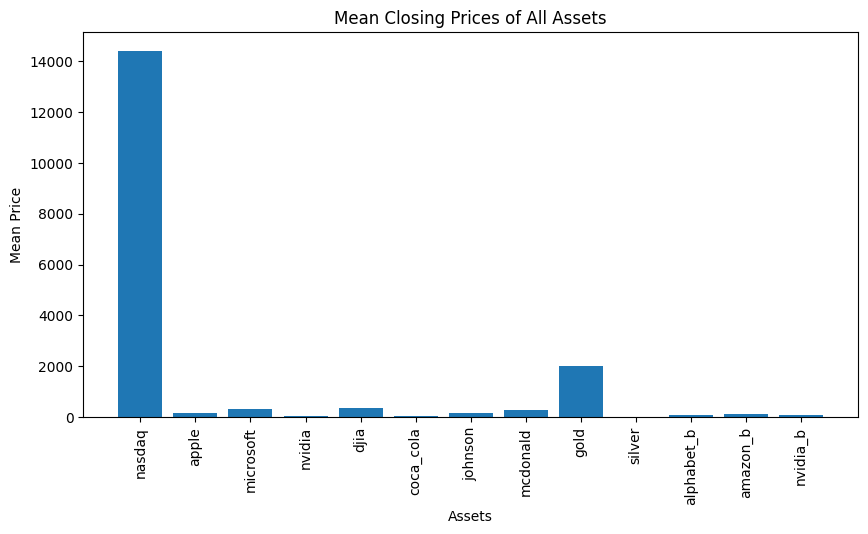

In [57]:
# Plotting the mean prices

plt.figure(figsize=(10, 5))
plt.bar(summary_df.index, summary_df["mean"])
plt.xticks(rotation=90)                        # This makes the x axis label rotate
plt.title("Mean Closing Prices of All Assets")
plt.xlabel("Assets")
plt.ylabel("Mean Price")
plt.show()

Assumed findings:


1.   NASDAQ has the highest average and standard deviation, indicating towards strong market position but more risk as well.
2.   Within the tech industry, Microsoft has the highest average price, but more risky compared to Apple and Nvidia. Apple's stock is more stable.
3.   Gold's average is quite high which is expectd. It also shows fluctuation, which can be attributed to 2021 to 2023 Post COVID inflation. Furthermore, within this time period, the world is going through geopolitical crisis, such as war and inflation, which impact the gold price. Compared to Gold, Silver was cheap and less volatile. (Ref: https://now.tufts.edu/2025/03/25/why-price-gold-so-high?)
4.   Coca Cola, McDonald's, and Johnson & Johnson are less risky investment options for investors. Among the three, McDonal's has the high average stock price.
5.   The choosen three bonds from Alphabet, Amazon, and Nvidia provided high stock prices with very little risk.

Now, I want to investigate the risk and volatility by looking at the daily return and its distribution. I decided to investigate the return instead of the price, because I want to compare on the same scale. Comparing prices, as it is, can be misleading, because the price of one stock can be 1,000, whereas another can be 100. We can see an example of this when we compare the average price of NASDAQ and Apple. Using return is one way of normalizing the data. According to Markowitz (1952), investment risk and relations between assets are better measured using returns rather than prices.

Finally, I have decided not to include bond investments.



reference: Markowitz, H. (1952) 'Portfolio Selection' The Journal of Finance, 7(1), pp.77–91.

In [27]:
# Calculating Percentage Daily Return

nasdaq["Return"] = nasdaq["Price"].pct_change()

apple["Return"] = apple["Price"].pct_change()

microsoft["Return"] = microsoft["Price"].pct_change()

nvidia["Return"] = nvidia["Price"].pct_change()

djia["Return"] = djia["Price"].pct_change()

coca_cola["Return"] = coca_cola["Price"].pct_change()

johnson["Return"] = johnson["Price"].pct_change()

mcdonald["Return"] = mcdonald["Price"].pct_change()

gold["Return"] = gold["Price"].pct_change()

silver["Return"] = silver["Price"].pct_change()


# Reference for Percentage Change function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html


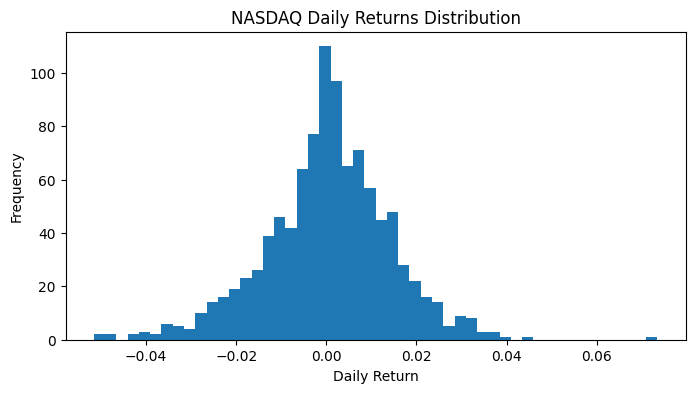

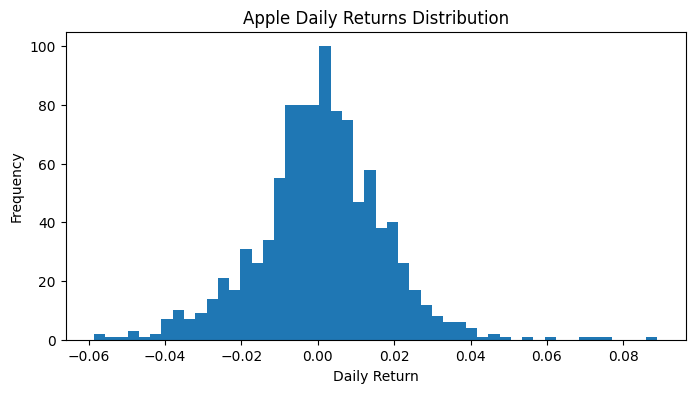

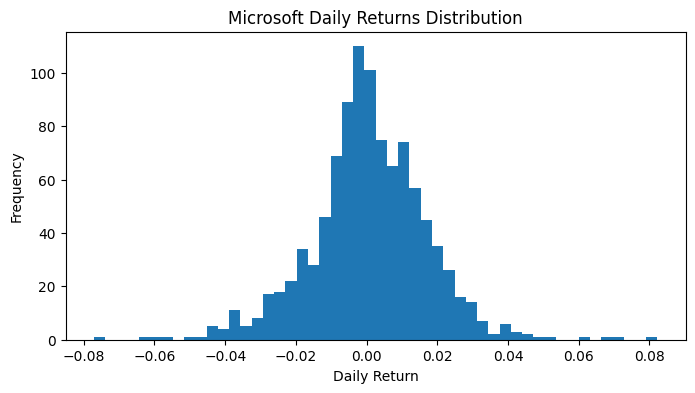

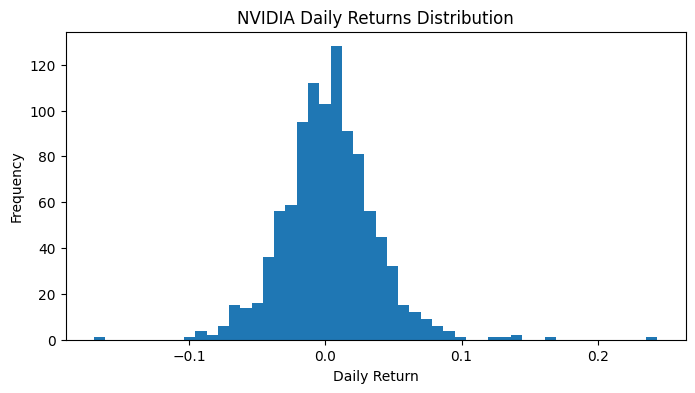

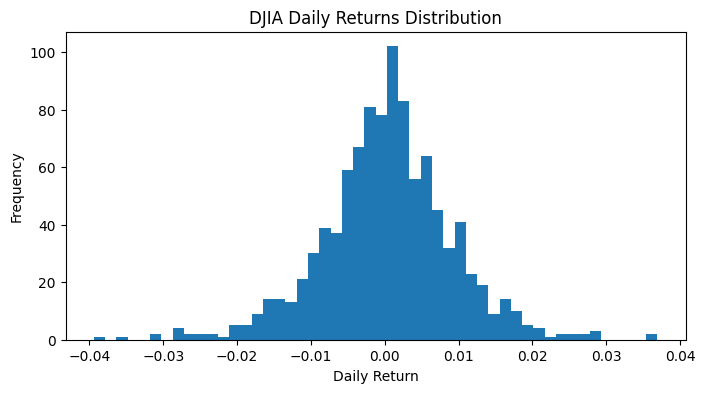

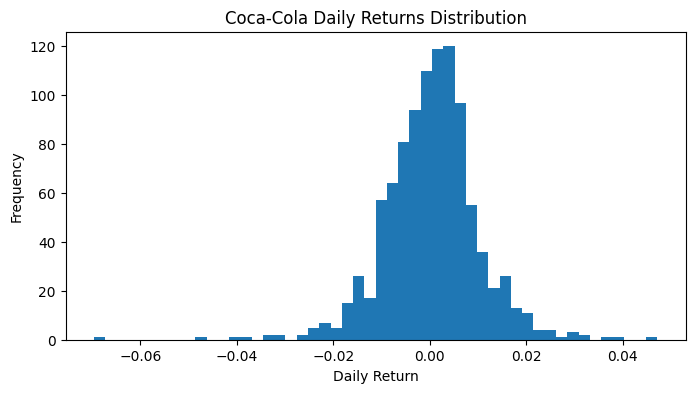

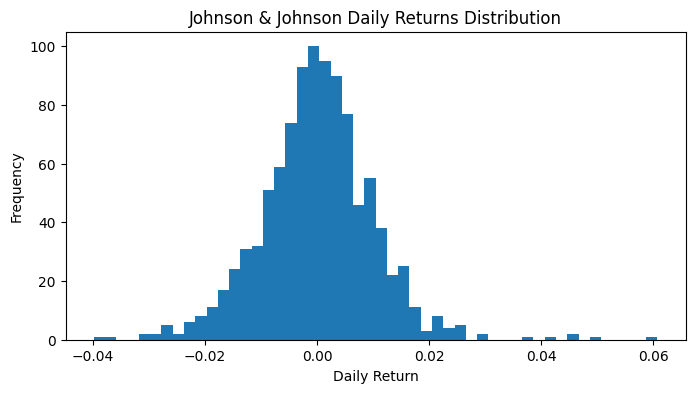

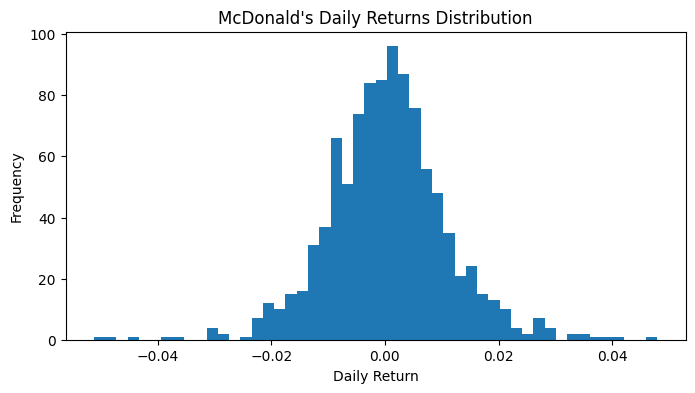

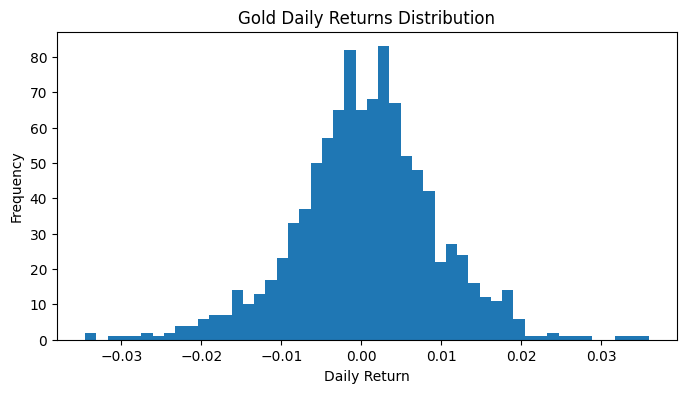

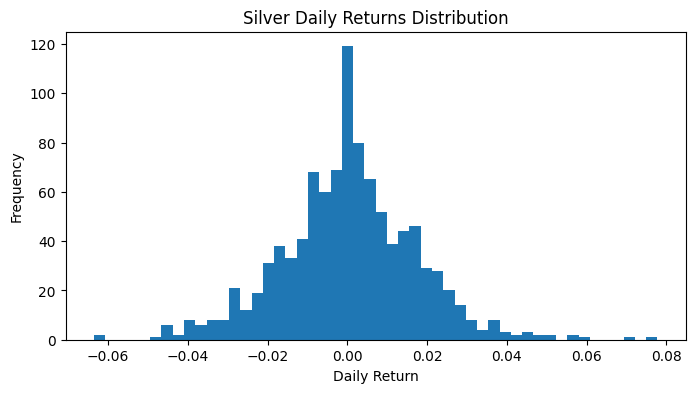

In [28]:
# Drawing Histogram. I have used 50 bins because we are dealing with daily 5 years of data.

plt.figure(figsize=(8, 4))
plt.hist(nasdaq["Return"].dropna(), bins=50)    # dropna() is to drop the first row that doesn't have a return value.
plt.title("NASDAQ Daily Returns Distribution")
plt.xlabel("Daily Return")                      # Label for X axis
plt.ylabel("Frequency")                         # Label for Y axis
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(apple["Return"].dropna(), bins=50)
plt.title("Apple Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(microsoft["Return"].dropna(), bins=50)
plt.title("Microsoft Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(nvidia["Return"].dropna(), bins=50)
plt.title("NVIDIA Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(djia["Return"].dropna(), bins=50)
plt.title("DJIA Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(coca_cola["Return"].dropna(), bins=50)
plt.title("Coca-Cola Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(johnson["Return"].dropna(), bins=50)
plt.title("Johnson & Johnson Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(mcdonald["Return"].dropna(), bins=50)
plt.title("McDonald's Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(gold["Return"].dropna(), bins=50)
plt.title("Gold Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(silver["Return"].dropna(), bins=50)
plt.title("Silver Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


# Reference for Histogram Code: https://www.w3schools.com/python/matplotlib_histograms.asp

Findings from the graphs:

1.   NASDAQ: Looks like normally distributed and centered around the mean with a negligible number of outliers. Most of the values are between -0.02 and 0.02.

2.   Apple: The histogram looks wider than NASDAQ, but is almost normally distributed. Naturally, NASDAQ looks less volatile than Apple because NASDAQ’s volatility averages out across stocks.

3.   Microsoft: It is more stable than Apple, with its center around the 0. Like NASDAQ, most of the values are between -0.02 and 0.02.

4.   NVIDIA: As it is a tech stock, NVIDIA’s stocks show high volatility. The return is distributed between -0.1 to 0.1. It does look like a bell shape. There are a few positive outliers.

5.   DJIA: The return is normally distributed, with most of the values between -0.02 and 0.02. It is less volatile than NASDAQ.

6.   Coca Cola: Its return is what you expect from a mature, stable company in the consumer industry. The distribution is narrow, indicating less volatility. It is a safe choice for a risk-averse investor.

7.   Johnson & Johnson: Similar to Coca Cola with a few more positive outliers. It is also a safe choice for investors.

8.   McDonald’s: Normally distributed but slightly wider distribution than Johnson & Johnson and Coca Cola. Compared to the other two, McDonald’s has more outliers, especially in the negative zone.

9.   Gold: It is normally distributed with a center around zero, with most of the values between -0.02 and 0.02. It has moderate volatility.

10.  Silver: Over the given time period, Silver shows more volatility than Gold, as the spread seems wider than Gold. It has some outliers, but they are mostly positive.

















Now, I want to investigate the relationship between NASDAQ and its constituent stocks, Microsoft, Apple, and NVIDIA, and between DJIA and its constituent stocks, Coca Cola, Johnson & Johnson, and McDonald's. For this, I will again use the calculated returns from the closing prices and plot Correlation Matrix.

In [29]:
# Creating a new dataset for NASDAQ and constituent stocks' return.

nas_return = pd.DataFrame({
    "NASDAQ": nasdaq["Return"],
    "Microsoft": microsoft["Return"],
    "Apple": apple["Return"],
    "NVIDIA": nvidia["Return"]
}).dropna()

# Creating a new dataset for DJIA and constituent stocks' return.

djia_return = pd.DataFrame({
    "DJIA": djia["Return"],
    "Coca Cola": coca_cola["Return"],
    "Johnson": johnson["Return"],
    "McDonald": mcdonald["Return"]
}).dropna()

In [30]:
print(nas_return.head())
print(djia_return.head())

     NASDAQ  Microsoft     Apple    NVIDIA
1 -0.024607  -0.026808 -0.029799 -0.038237
2 -0.005014  -0.005288 -0.001111 -0.014890
3  0.009860   0.005487 -0.004052  0.025244
4 -0.035192  -0.023705 -0.034783 -0.082178
5  0.005558   0.014804  0.002232  0.030584
       DJIA  Coca Cola   Johnson  McDonald
1  0.000889   0.010377 -0.006811 -0.000848
2  0.000476  -0.001778 -0.008834 -0.003490
3  0.013476   0.003364  0.013401  0.009228
4 -0.017521  -0.010649  0.001046 -0.010878
5 -0.014967  -0.023520 -0.026419 -0.022802


In [31]:
# Calculating correlation Matrix

cor_nas_ret = nas_return.corr()
cor_djia_ret = djia_return.corr()


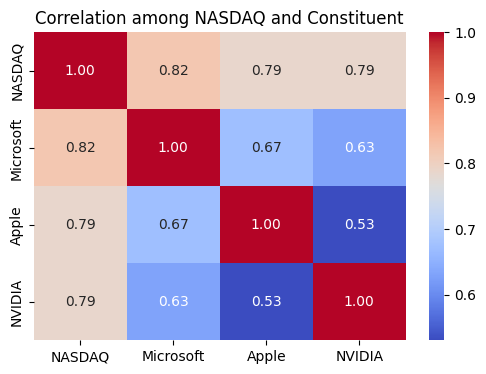

In [32]:
# Drawing Heatmap - Correlation Analysis

plt.figure(figsize=(6, 4))
sns.heatmap(cor_nas_ret, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation among NASDAQ and Constituent')
plt.show()

From the graph, it is clear that all three stocks have a high positive correlation with NASDAQ's stock. This means when NASDAQ increases or decreases, these stocks follow the same direction. The relation among the three stocks is moderately high. Among them, Apple and NVIDIA have the weakest relation.

If someone wants to build a portfolio of three assets, they should avoid a portfolio with only these stocks, Apple, Microsoft, and NVIDIA, in order to diversify and reduce risk.

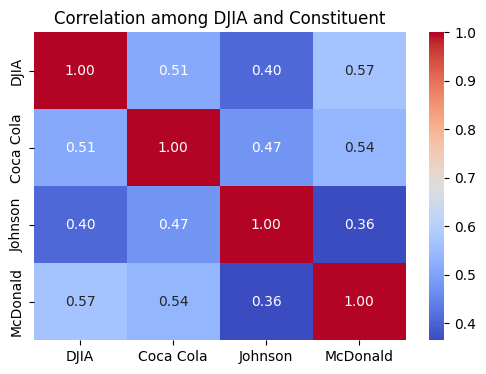

In [33]:
# Drawing Heatmap - Correlation Analysis

plt.figure(figsize=(6, 4))
sns.heatmap(cor_djia_ret, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation among DJIA and Constituent')
plt.show()

The relationship between DJIA and three constituent stocks is moderately high, with Johnson & Johnson having the weakest relation at 0.40 and McDonald's having the strongest at 0.57. As a result, movement in the DJIA index doesn't fully explain the movements in individual stocks.

If someone wants to build a three assets portfolio and still consider investing in these three stocks, they could invest in Johnson & Johnson, McDonald's, and some other stocks that have a negative correlation with the two.



# 4) Rebase - 2023

To perform Rebase NASDAQ and DJIA to the closing value of the first day of trade in 2023, I followed (Current Price/Base Price)*100 formula.

In [46]:
# Only keeping data starting from 2023

nasdaq_2023 = nasdaq[nasdaq["Date"].dt.year >= 2023].copy()
djia_2023 = djia[djia["Date"].dt.year >= 2023].copy()

# Finding the first trading day of 2023 and its closing price

base_nas = nasdaq_2023.iloc[0]["Price"]     # Setting the first value in the price column as base price
print(" NASDAQ's base price: ", base_nas)

base_djia = djia_2023.iloc[0]["Price"]
print(" DJIA's base price: ", base_djia)


# Rebase = (Current price/Base price) * 100

nasdaq_2023["Rebase"] = nasdaq_2023["Price"]/base_nas * 100
djia_2023["Rebase"] = djia_2023["Price"]/base_djia * 100

print(f'\n', nasdaq_2023.head())
print(f'\n', djia_2023.head())

 NASDAQ's base price:  10386.9848029256
 DJIA's base price:  331.36

           Date         Price    Return      Rebase
471 2023-01-03  10386.984803 -0.007595  100.000000
472 2023-01-04  10458.762221  0.006910  100.691032
473 2023-01-05  10305.240914 -0.014679   99.213016
474 2023-01-06  10569.293906  0.025623  101.755169
475 2023-01-09  10635.649488  0.006278  102.394003

           Date   Price    Return      Rebase
471 2023-01-03  331.36 -0.000332  100.000000
472 2023-01-04  332.70  0.004044  100.404394
473 2023-01-05  329.30 -0.010219   99.378320
474 2023-01-06  336.31  0.021288  101.493844
475 2023-01-09  335.18 -0.003360  101.152825


In [39]:
djia_2023.head()

,Date,Price,Return
471,2023-01-03,331.36,-0.000332
472,2023-01-04,332.70,0.004044
473,2023-01-05,329.30,-0.010219
474,2023-01-06,336.31,0.021288
475,2023-01-09,335.18,-0.003360


# 5) TIme Series Analysis